In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


In [2]:
names=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
       'sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid',
      'lithium','goitre','tumor','hypopituitary','psych','TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4','T4U_measured',
      'T4U','FTI_measured','FTI','TBG_measured','TBG','referral_source','classes']

In [3]:
data=pd.read_csv('/content/allhypo.data',names=names,na_values='?')
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,classes
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative.|3733
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative.|1442
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative.|2965
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative.|806
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative.|2807


In [4]:
data.shape

(2800, 30)

In [5]:
col_mod=data.classes.str.split('.',expand=True)
data[['last','final']]=col_mod
data=data.drop(['classes','final'],axis=1)

In [6]:
data=data.rename(columns={'last':'classes'})
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,classes
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2799 non-null   float64
 1   sex                        2690 non-null   object 
 2   on_thyroxine               2800 non-null   object 
 3   query_on_thyroxine         2800 non-null   object 
 4   on_antithyroid_medication  2800 non-null   object 
 5   sick                       2800 non-null   object 
 6   pregnant                   2800 non-null   object 
 7   thyroid_surgery            2800 non-null   object 
 8   I131_treatment             2800 non-null   object 
 9   query_hypothyroid          2800 non-null   object 
 10  query_hyperthyroid         2800 non-null   object 
 11  lithium                    2800 non-null   object 
 12  goitre                     2800 non-null   object 
 13  tumor                      2800 non-null   objec

In [8]:
data.isnull().sum()

age                             1
sex                           110
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           284
T3_measured                     0
T3                            585
TT4_measured                    0
TT4                           184
T4U_measured                    0
T4U                           297
FTI_measured                    0
FTI                           295
TBG_measured                    0
TBG                          2800
referral_source                 0
classes       

In [9]:
data.drop('TBG',axis=1,inplace=True)

In [10]:
def find_numeric_and_categorical_columns(data):
    numeric_columns = data.select_dtypes(include=['number']).columns
    categorical_columns = data.select_dtypes(exclude=['number']).columns

    return numeric_columns, categorical_columns


numeric,categoric = find_numeric_and_categorical_columns(data)

print("the numeric data")
print(numeric)

print("The categoric data")

print(categoric)

the numeric data
Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')
The categoric data
Index(['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured',
       'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured',
       'TBG_measured', 'referral_source', 'classes'],
      dtype='object')


In [11]:
# for handling the null values the median for the numeric values

def handle_null(data,numeric):
  for column in numeric:
    if data[column].isnull().any():
      median_value=data[column].median()
      data[column].fillna(median_value,inplace=True)

handle_null(data,numeric)

In [12]:
data.isnull().sum()

age                            0
sex                          110
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                            0
T3_measured                    0
T3                             0
TT4_measured                   0
TT4                            0
T4U_measured                   0
T4U                            0
FTI_measured                   0
FTI                            0
TBG_measured                   0
referral_source                0
classes                        0
dtype: int64

<Axes: xlabel='classes', ylabel='FTI'>

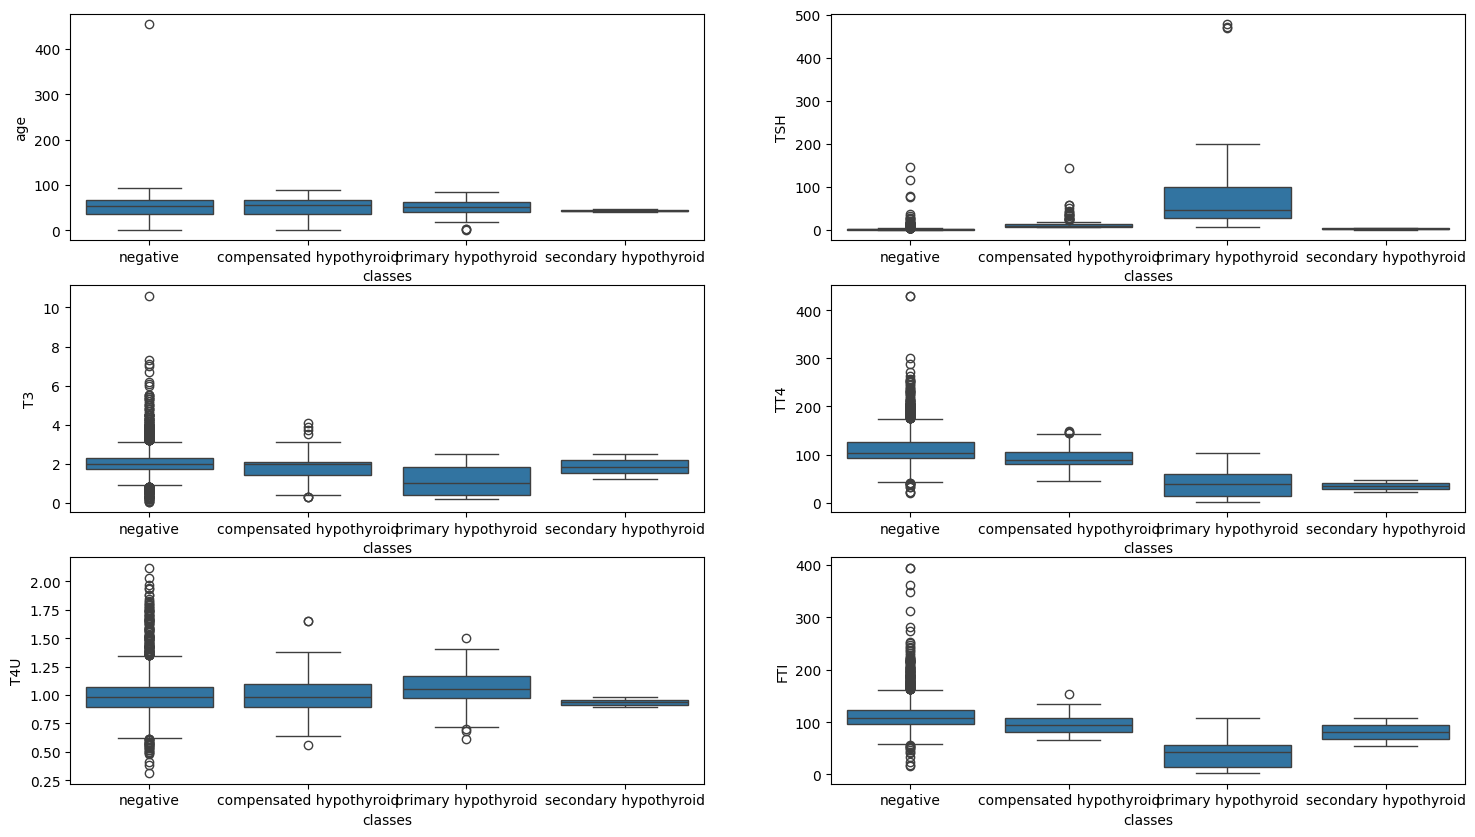

In [13]:
#Check for outliers
fig, axes = plt.subplots(3,2, figsize=(18, 10))


sns.boxplot(ax=axes[0, 0], data=data, x='classes', y='age')
sns.boxplot(ax=axes[0, 1], data=data, x='classes', y='TSH')
sns.boxplot(ax=axes[1, 0], data=data, x='classes', y='T3')
sns.boxplot(ax=axes[1, 1], data=data, x='classes', y='TT4')
sns.boxplot(ax=axes[2, 0], data=data, x='classes', y='T4U')
sns.boxplot(ax=axes[2, 1], data=data, x='classes', y='FTI')

In [14]:
# handle the categorical features

def handle_categorical_data(data,categoric):
  for cols in categoric:
    if data[cols].isnull().any():
      mode_val = data[cols].mode().iloc[0]
      data[cols].fillna(mode_val,inplace=True)

handle_categorical_data(data,categoric)

In [15]:
data.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
referral_source              0
classes                      0
dtype: int64

In [16]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,classes
0,41.0,F,f,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,2.0,t,102.0,f,0.98,f,107.0,f,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,2.0,t,109.0,t,0.91,t,120.0,f,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,1.9,t,175.0,f,0.98,f,107.0,f,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,SVI,negative


<Axes: xlabel='classes', ylabel='age'>

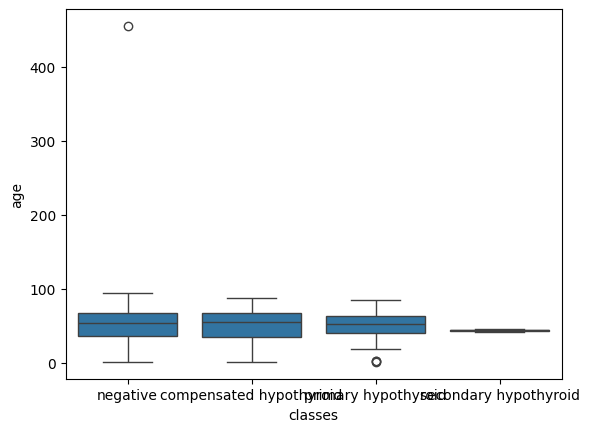

In [17]:
sns.boxplot(data=data,x='classes',y='age')

In [18]:
# we can see there is a outlier in age
data[data.age>100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,classes
1364,455.0,F,f,f,f,f,f,f,f,f,...,2.0,t,118.0,t,1.13,t,104.0,f,SVI,negative


In [19]:
data.drop(index=1364,inplace=True)

In [20]:
data[data.age>100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,classes


In [21]:

numeric_columns = data.select_dtypes(include=['number']).columns
numeric_data = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

numeric_data = numeric_data.dropna()

q1, q3 = np.percentile(numeric_data, [25, 75])

In [22]:
numeric_data

,age,TSH,T3,TT4,T4U,FTI
0,41.0,1.30,2.5,125.0,1.14,109.0
1,23.0,4.10,2.0,102.0,0.98,107.0
2,46.0,0.98,2.0,109.0,0.91,120.0
3,70.0,0.16,1.9,175.0,0.98,107.0
4,70.0,0.72,1.2,61.0,0.87,70.0
...,...,...,...,...,...,...
2795,70.0,2.70,2.0,155.0,1.05,148.0
2796,73.0,1.40,0.7,63.0,0.88,72.0
2797,75.0,1.40,2.0,147.0,0.80,183.0
2798,60.0,1.40,2.0,100.0,0.83,121.0


In [23]:
print(q1,q3)

1.3 92.0


In [24]:
iqr = q3 - q1
print(iqr)

90.7


In [25]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [26]:
lower_bound

-134.75

In [27]:
upper_bound

228.05

In [28]:
def outliers_removal(numerical_missing):
    for column in numerical_missing:
        sort=np.sort(numeric_data[column])
        lower_limit,upper_limit=np.percentile(sort,[0,95])
        detected_outliers=numeric_data.iloc[np.where((numeric_data[column]>upper_limit) | (numeric_data[column]<lower_limit))]
        return detected_outliers

In [29]:
outlier_data = outliers_removal(data)

In [30]:
outlier_data

,age,TSH,T3,TT4,T4U,FTI
7,80.0,2.20,0.6,80.0,0.70,115.0
10,84.0,1.10,2.2,115.0,0.95,121.0
18,80.0,6.00,1.6,99.0,0.95,104.0
22,81.0,1.90,0.3,102.0,0.96,106.0
34,85.0,7.30,2.4,66.0,1.09,61.0
...,...,...,...,...,...,...
2773,84.0,3.60,0.6,82.0,0.74,110.0
2774,82.0,2.20,1.0,68.0,0.77,88.0
2783,82.0,0.50,2.0,125.0,0.84,149.0
2793,82.0,0.03,1.4,74.0,0.52,143.0


In [31]:
new_data=data.drop(outlier_data.index)

In [32]:
new_data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,classes
0,41.0,F,f,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,2.0,t,102.0,f,0.98,f,107.0,f,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,2.0,t,109.0,t,0.91,t,120.0,f,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,1.9,t,175.0,f,0.98,f,107.0,f,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,25.0,F,f,f,f,f,f,f,f,f,...,1.7,t,167.0,t,1.21,t,137.0,f,other,negative
2795,70.0,M,f,f,f,f,f,f,f,f,...,2.0,t,155.0,t,1.05,t,148.0,f,SVI,negative
2796,73.0,M,f,t,f,f,f,f,f,f,...,0.7,t,63.0,t,0.88,t,72.0,f,other,negative
2797,75.0,M,f,f,f,f,f,f,f,f,...,2.0,t,147.0,t,0.80,t,183.0,f,other,negative


In [33]:
new_data.to_csv('preprocessed_data.csv',index=False)


In [34]:
x=new_data.iloc[:,:-1]
y=new_data.iloc[:,-1]


In [35]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source
0,41.0,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,f,SVHC
1,23.0,F,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,0.98,f,107.0,f,other
2,46.0,M,f,f,f,f,f,f,f,f,...,f,2.0,t,109.0,t,0.91,t,120.0,f,other
3,70.0,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175.0,f,0.98,f,107.0,f,other
4,70.0,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,f,SVI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,25.0,F,f,f,f,f,f,f,f,f,...,t,1.7,t,167.0,t,1.21,t,137.0,f,other
2795,70.0,M,f,f,f,f,f,f,f,f,...,f,2.0,t,155.0,t,1.05,t,148.0,f,SVI
2796,73.0,M,f,t,f,f,f,f,f,f,...,t,0.7,t,63.0,t,0.88,t,72.0,f,other
2797,75.0,M,f,f,f,f,f,f,f,f,...,f,2.0,t,147.0,t,0.80,t,183.0,f,other


In [36]:
y

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
2794    negative
2795    negative
2796    negative
2797    negative
2798    negative
Name: classes, Length: 2666, dtype: object

In [37]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [38]:
x_train.shape

(1866, 28)

In [39]:
y_train.shape

(1866,)

In [40]:
y_test.value_counts()

negative                   749
compensated hypothyroid     36
primary hypothyroid         15
Name: classes, dtype: int64

In [41]:
y_train.value_counts()

negative                   1706
compensated hypothyroid     111
primary hypothyroid          47
secondary hypothyroid         2
Name: classes, dtype: int64

In [42]:
x_train

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source
814,68.0,M,f,f,f,f,f,f,f,f,...,t,2.2,t,99.0,t,0.86,t,115.0,f,SVI
2485,58.0,F,f,f,f,f,f,f,f,f,...,t,1.9,t,123.0,t,0.99,t,124.0,f,SVI
454,50.0,F,f,f,f,f,f,f,f,f,...,t,1.7,t,128.0,t,1.08,t,118.0,f,other
2430,24.0,F,f,f,f,f,f,f,f,f,...,t,3.0,t,143.0,t,1.33,t,108.0,f,SVHC
1088,55.0,F,f,f,f,f,f,f,f,f,...,t,1.9,t,85.0,t,1.07,t,80.0,f,SVHC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,56.0,F,f,f,f,f,f,f,f,f,...,f,2.0,t,117.0,t,1.11,t,105.0,f,other
1026,20.0,M,f,f,f,f,f,f,f,f,...,t,2.2,t,117.0,f,0.98,f,107.0,f,other
12,71.0,F,f,f,f,t,f,f,f,f,...,t,3.8,t,171.0,t,1.13,t,151.0,f,other
1496,45.0,M,t,f,f,f,f,f,f,f,...,f,2.0,t,101.0,t,0.95,t,106.0,f,other


In [46]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Assuming x_train and x_test are your training and testing datasets

# Identify categorical columns
categorical_columns = x_train.select_dtypes(exclude='number').columns

# Fit and transform on the training set
ordinal_encoder = OrdinalEncoder()
X_train_cat_encoded = pd.DataFrame(ordinal_encoder.fit_transform(x_train[categorical_columns]))
X_train_cat_encoded.columns = categorical_columns

# Transform the test set
X_test_cat_encoded = pd.DataFrame(ordinal_encoder.fit_transform(x_test[categorical_columns]))
X_test_cat_encoded.columns = categorical_columns


In [47]:
X_train_cat_encoded.shape

(1866, 22)

In [48]:
X_test_cat_encoded.shape

(800, 22)

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0
2235,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0
2236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0
2237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0


In [49]:
label_encoder = LabelEncoder()
y_train_cat_encoded= pd.DataFrame(label_encoder.fit_transform(y_train))
print(y_train_cat_encoded.value_counts())
print(y_train.value_counts())

1    1706
0     111
2      47
3       2
dtype: int64
negative                   1706
compensated hypothyroid     111
primary hypothyroid          47
secondary hypothyroid         2
Name: classes, dtype: int64


In [50]:
y_train_cat_encoded=y_train_cat_encoded.astype('float32')

In [51]:
y_train_cat_encoded.shape

(1866, 1)

In [52]:
y_train_cat_encoded.value_counts()

1.0    1706
0.0     111
2.0      47
3.0       2
dtype: int64

In [53]:
y_train_cat_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1866 non-null   float32
dtypes: float32(1)
memory usage: 7.4 KB


In [54]:
y_test_cat_encoded = pd.DataFrame(label_encoder.transform(y_test))


In [55]:
y_test_cat_encoded.value_counts()

1    749
0     36
2     15
dtype: int64

In [56]:
y_test_cat_encoded=y_test_cat_encoded.astype('float32')

In [57]:
y_test_cat_encoded.shape

(800, 1)

In [60]:
X_train_cat_encoded.shape

(1866, 22)

In [ ]:
y_train_cat_encoded.shape

(1959, 1)

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_sc=pd.DataFrame(sc.fit_transform(x_train.select_dtypes(exclude='O')))
X_test_sc=pd.DataFrame(sc.transform(x_test.select_dtypes(exclude='O')))

X_train_sc.columns=x_train.select_dtypes(exclude='O').columns
X_test_sc.columns=x_test.select_dtypes(exclude='O').columns

In [62]:
X_train_final=pd.concat([X_train_sc,X_train_cat_encoded],axis=1)

X_test_final=pd.concat([X_test_sc,X_test_cat_encoded],axis=1)

In [63]:

X_train_resample,Y_train_resample=SMOTE(random_state=0,k_neighbors=1).fit_resample(X_train_final,y_train_cat_encoded)
X_test_resample,Y_test_resample=SMOTE(random_state=0,k_neighbors=1).fit_resample(X_test_final,y_test_cat_encoded)

X_train_resample.shape,X_test_resample.shape,Y_train_resample.shape,Y_test_resample.shape

((6824, 28), (2247, 28), (6824, 1), (2247, 1))

In [64]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier
print('Training dataset shape:', X_train_resample.shape, Y_train_resample.shape)
print('Testing dataset shape:', X_test_resample.shape, Y_test_resample.shape)

Y_train_resample_flat = Y_train_resample.to_numpy().ravel()
Y_test_resample_flat = Y_test_resample.to_numpy().ravel()

print('Training dataset shape:', X_train_resample.shape, Y_train_resample_flat.shape)
print('Testing dataset shape:', X_test_resample.shape, Y_test_resample_flat.shape)

Training dataset shape: (6824, 28) (6824, 1)
Testing dataset shape: (2247, 28) (2247, 1)
Training dataset shape: (6824, 28) (6824,)
Testing dataset shape: (2247, 28) (2247,)


In [65]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5)

forward_fs = sfs(rf , k_features=10,forward=True,floating=False,verbose=2,scoring='accuracy',cv=5)

forward_fs = forward_fs.fit(X_train_resample, Y_train_resample_flat)


[2024-01-27 06:59:14] Features: 1/10 -- score: 0.7766707486062325
[2024-01-27 07:00:14] Features: 2/10 -- score: 0.9632185019281794
[2024-01-27 07:01:10] Features: 3/10 -- score: 0.9849062765191798
[2024-01-27 07:02:19] Features: 4/10 -- score: 0.9898889282760251
[2024-01-27 07:03:18] Features: 5/10 -- score: 0.9923798781863298
[2024-01-27 07:04:15] Features: 6/10 -- score: 0.994431589915461
[2024-01-27 07:05:03] Features: 7/10 -- score: 0.9951641906480617
[2024-01-27 07:05:50] Features: 8/10 -- score: 0.9963361369812983
[2024-01-27 07:06:51] Features: 9/10 -- score: 0.9967760196792455
[2024-01-27 07:07:41] Features: 10/10 -- score: 0.9970690599722858

In [66]:
feat_names = list(forward_fs.k_feature_names_)
print(feat_names)

['TSH', 'TT4', 'T4U', 'FTI', 'on_thyroxine', 'goitre', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'referral_source']


In [76]:
X_train_new=X_train_resample[['age','sex','TSH', 'TT4', 'FTI', 'on_thyroxine', 'on_antithyroid_medication', 'goitre', 'hypopituitary', 'psych', 'T3_measured' ]]
X_test_new=X_test_resample[['age','sex','TSH', 'TT4', 'FTI', 'on_thyroxine', 'on_antithyroid_medication', 'goitre', 'hypopituitary', 'psych', 'T3_measured']]

In [77]:
rf_model=rf.fit(X_train_new,Y_train_resample_flat)


In [78]:
X_test_new

,age,sex,TSH,TT4,FTI,on_thyroxine,on_antithyroid_medication,goitre,hypopituitary,psych,T3_measured
0,1.452151,0.0,-0.102683,0.275508,0.254413,0.000000,0.0,0.0,0.0,0.0,0.0
1,1.285536,0.0,-0.125920,0.218056,-0.340331,0.000000,0.0,0.0,0.0,0.0,1.0
2,0.508000,1.0,-0.149158,1.108573,0.692645,0.000000,0.0,0.0,0.0,0.0,1.0
3,1.341074,0.0,-0.217709,-0.011755,0.504831,0.000000,0.0,0.0,0.0,0.0,1.0
4,-1.769070,0.0,0.524735,-0.959725,-1.310703,0.000000,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2242,0.850622,0.0,2.303215,-2.678449,-2.997498,0.000000,0.0,0.0,0.0,0.0,1.0
2243,1.599353,0.0,1.142114,-1.755905,-1.925807,0.000000,0.0,0.0,0.0,0.0,1.0
2244,-0.658618,0.0,2.137018,-2.204277,-2.483368,0.000000,0.0,0.0,0.0,0.0,1.0
2245,-0.679509,0.0,2.212775,-2.059478,-2.335790,0.000000,0.0,0.0,0.0,0.0,1.0


In [79]:
X_train_new.shape

(6824, 11)

In [80]:
X_test_new.shape

(2247, 11)

In [82]:
Y_train_resample_flat.shape

(6824,)

In [83]:
Y_test_resample.shape

(2247, 1)

In [84]:

from sklearn.metrics import accuracy_score, classification_report

y_pred = rf_model.predict(X_test_new)


accuracy = accuracy_score(Y_test_resample, y_pred)
print(f"Accuracy: {accuracy:.2f}")




Accuracy: 0.97


In [85]:
y_pred.shape


(2247,)

NameError: name 'dtype' is not defined

In [ ]:
y_test

ValueError: invalid literal for int() with base 10: 'negative'

In [87]:
report = classification_report(Y_test_resample_flat, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       749
         1.0       1.00      1.00      1.00       749
         2.0       0.99      0.94      0.96       749

    accuracy                           0.97      2247
   macro avg       0.97      0.97      0.97      2247
weighted avg       0.97      0.97      0.97      2247



In [88]:
import pickle

# Assuming you have trained a Random Forest model named 'rf_classifier'

# Save the trained model to a file using pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

# Now, the trained Random Forest model is saved in a file named 'random_forest_model.pkl'


In [108]:
import random

# Generate random binary values for each feature
Age = random.choice([0, 1])
Sex = random.choice([0, 1])
Level_thyroid_stimulating_hormone = random.choice([0, 1])
Total_thyroxine_TT4 = random.choice([0, 1])
Free_thyroxine_index = random.choice([0, 1])
On_thyroxine = random.choice([0, 1])
On_antithyroid_medication = random.choice([0, 1])
Goitre = random.choice([0, 1])
Hypopituitary = random.choice([0, 1])
Psychological_symptoms = random.choice([0, 1])
T3_measured = random.choice([0, 1])



In [109]:
arr=np.array([[Age,Sex,Level_thyroid_stimulating_hormone,Total_thyroxine_TT4,Free_thyroxine_index,
        On_thyroxine,On_antithyroid_medication,Goitre,Hypopituitary,Psychological_symptoms,T3_measured]])
pred=rf_model.predict(arr)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [110]:
pred

array([0.], dtype=float32)